## Ridge Regression Tutorial

In [29]:
#Import Statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression

In [30]:
#Make Datasets

X,y = make_regression(n_samples=1000,n_features=4,noise=1, random_state=315,effective_rank=2)

df = pd.DataFrame(X,columns=["a","b","c","d"])
df["e"] = y
print(df)


            a         b         c         d         e
0    0.027336  0.031968  0.032909 -0.020835  2.508680
1    0.054828  0.009820 -0.058520 -0.043912 -2.338388
2    0.016675 -0.021403  0.000577 -0.008632  1.637848
3    0.059806 -0.002554  0.020184 -0.071578  2.056444
4    0.006032 -0.012073  0.031105 -0.015648 -0.499627
..        ...       ...       ...       ...       ...
995  0.017786 -0.016251 -0.004273  0.018320  3.588586
996  0.000228 -0.012068 -0.011257 -0.000986 -0.539900
997  0.034886 -0.023162  0.007880 -0.026341  2.734438
998 -0.020506  0.004969 -0.005824  0.051761  0.860965
999  0.007757  0.018735 -0.006463 -0.021941 -0.662300

[1000 rows x 5 columns]


### Split the Data into train and test data.

In [31]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=315)

### Scale the feature data

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



### Create Regression Model

In [33]:
ridge = Ridge()
ridge.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### Score the model

In [34]:
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.8827270684238728
0.8823239708741615


### Create prediction

In [35]:
y_pred = ridge.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean ABS Error - {mae}')
print(f'Mean SQR Error - {mse}')
print(f'R2 Score - {r2}')


Mean ABS Error - 0.7718329977434223
Mean SQR Error - 1.0162619798404038
R2 Score - 0.8823239708741615


### Hyper Parameter Tuning

In [36]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_cv = GridSearchCV(ridge, param_grid, cv=3, n_jobs=-1)
ridge_cv.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1.0


### Cross Validation Prediction

In [37]:
y_pred2 = ridge_cv.predict(X_test)

mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print(f'Mean ABS Error - {mae}')
print(f'Mean SQR Error - {mse}')
print(f'R2 Score - {r2}')

Mean ABS Error - 0.7718329977434223
Mean SQR Error - 1.0162619798404038
R2 Score - 0.8823239708741615


In [38]:
ridge_cv.best_estimator_
print(ridge_cv.best_estimator_.coef_)
print(ridge_cv.best_estimator_.intercept_)

[2.33808327 0.10831256 1.60647927 2.00079915]
-0.062428553956077944


### Plot Features

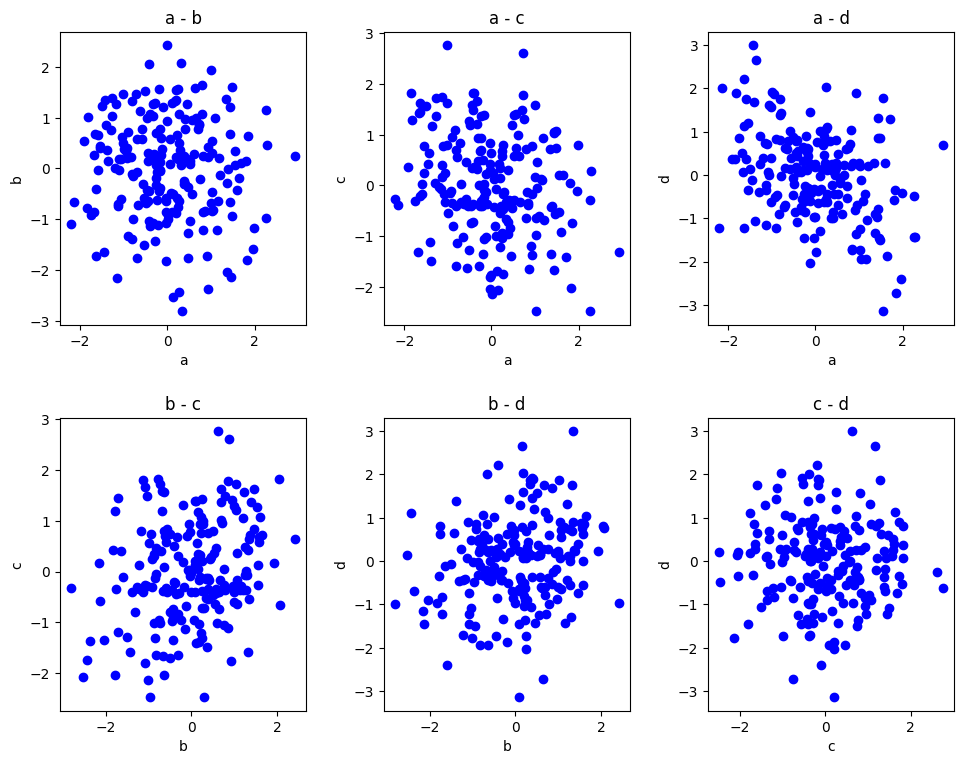

In [39]:
rows = 2
cols = 3

feature_x_index = 0
feature_y_index = feature_x_index + 1
running = True
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10,8))
for i in range(rows):
    if not running:
        break
    for j in range(cols):
        ax = axs[i,j]
        data_x = X_test[:,feature_x_index]
        data_y = X_test[:,feature_y_index]
        ax.scatter(data_x,data_y, color="blue")
        title = f'{df.columns[feature_x_index]} - {df.columns[feature_y_index]}'
        ax.set_title(title)
        ax.set_xlabel(f'{df.columns[feature_x_index]}')
        ax.set_ylabel(f'{df.columns[feature_y_index]}')
        feature_y_index += 1
        if feature_y_index == X_test.shape[1]:
            feature_x_index += 1
            feature_y_index = feature_x_index + 1
            if feature_y_index == X_test.shape[1]:
                running = False   
                break

plt.tight_layout(pad=2.0)
plt.show()
        


### Plot Fetures vs Target

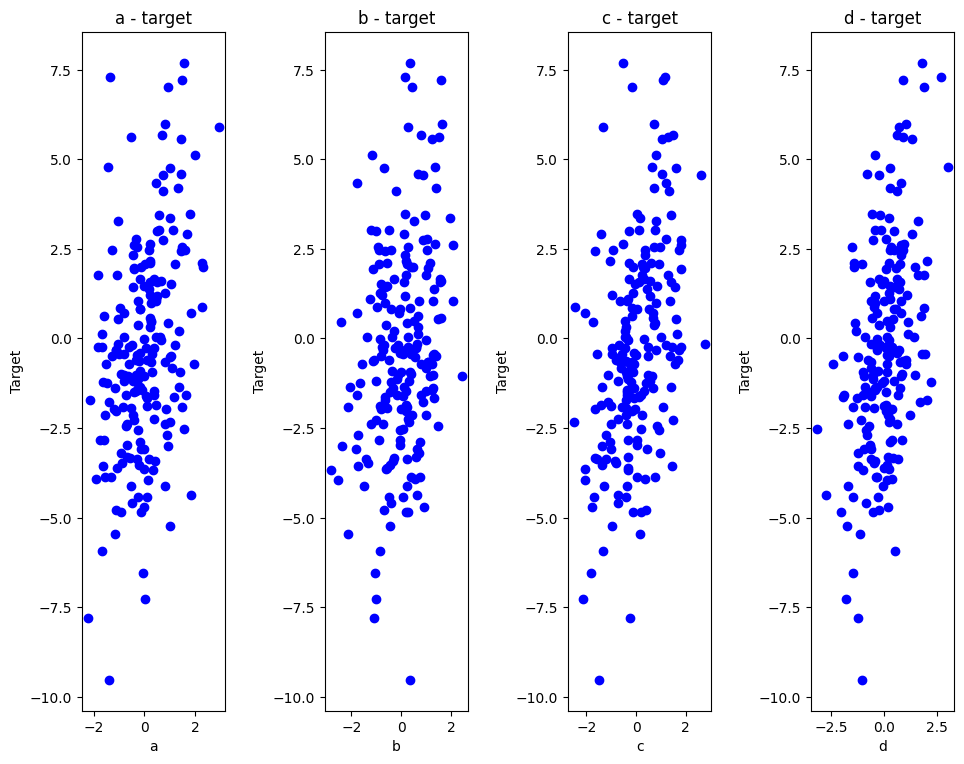

In [42]:
rows = 1
cols = 4

feature_x_index = 0
feature_y_index = feature_x_index + 1
running = True
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10,8))
for i in range(rows):
    if not running:
        break
    for j in range(cols):
        if rows < 2:
            ax = axs[j]
        else:
            ax = axs[i,j]
        data_x = X_test[:,feature_x_index]
        data_y = y_test
        ax.scatter(data_x,data_y, color="blue")
        title = f'{df.columns[feature_x_index]} - target'
        ax.set_title(title)
        ax.set_xlabel(f'{df.columns[feature_x_index]}')
        ax.set_ylabel(f'Target')
        feature_x_index += 1
        

plt.tight_layout(pad=2.0)
plt.show()

### Scratch pad

In [41]:
arr = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10,11,12]
])

print(arr.shape)
col_index = 1 - arr.shape[1]
arr1 = arr[:,col_index]
print(arr1)

(4, 3)
[ 2  5  8 11]
